<a href="https://colab.research.google.com/github/kondurunikhil/cmpe255_group/blob/main/sms_spam_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from google.colab import files
import io
from matplotlib import style
import pathlib
import warnings
warnings.filterwarnings('ignore')
import wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [ ]:
data = files.upload()

Saving SMSspam.csv to SMSspam (1).csv


In [ ]:
data = pd.read_csv("SMSspam.csv",encoding="utf-8")
data

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.tail()

,Class,input Text
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...
5573,ham,Rofl. Its true to its name


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


this gives information about the dataframe.

In [ ]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


returns description of data in the dataframe.

In [ ]:
data.shape

(5574, 2)

Returns number of rows and columns in dataframe.

In [ ]:
data.dtypes

Class         object
input Text    object
dtype: object

returns data type of each column.

In [ ]:
data['Class'].value_counts()

ham     4827
spam     747
Name: Class, dtype: int64

Return a Series containing counts of unique rows in the DataFrame.

In [ ]:
data['input Text'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st "Ur Lovely Friendship"... good morning dear                 4
                                                                                                                                                      

Return a Series containing counts of unique rows in the DataFrame.

In [ ]:
print("length of dataset: ", len(data))

length of dataset:  5574


Text(0, 0.5, 'Count')

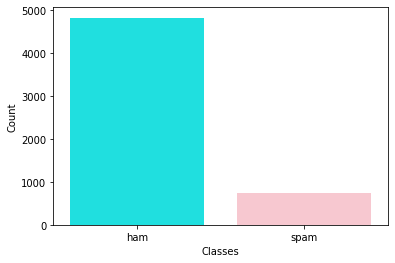

In [ ]:
#Checking if the data is imbalanced or not
cols= ["#00FFFF", "#FFC0CB"] #colour palette
bar = sns.countplot(x= data["Class"], palette= cols)
bar.set_xlabel("Classes")
bar.set_ylabel("Count")

Also observed that number of legitimate messages(ham) are much more than spam messages.

Hence, The data imbalance is quite evident here.

In [ ]:
data['spam'] = data['Class'].map( {'spam': 1, 'ham': 0} ).astype(int)
data.head()

,Class,input Text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


returns a new DataFrame where the data types has been changed to the specified type.

In [ ]:
data['length'] = data['input Text'].apply(len)

In [ ]:
data.head()

,Class,input Text,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


returns a new DataFrame where the data types has been changed to the specified type.

<Figure size 432x288 with 0 Axes>

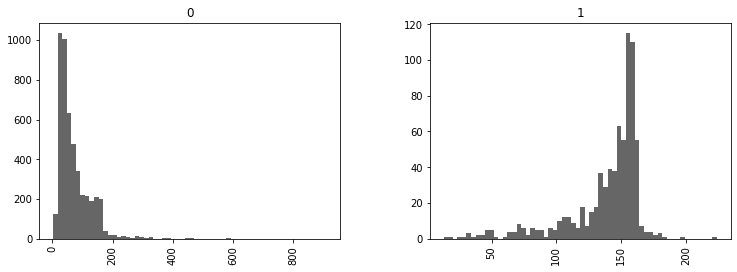

<Figure size 432x288 with 0 Axes>

In [ ]:
data.hist(column='length',by='spam',bins=60,figsize=(12,4),color='black',alpha=0.6);
plt.figure()

The above histogram shows length of Spam messages and Ham messages.

Text(0.5, 0, 'Message Length')

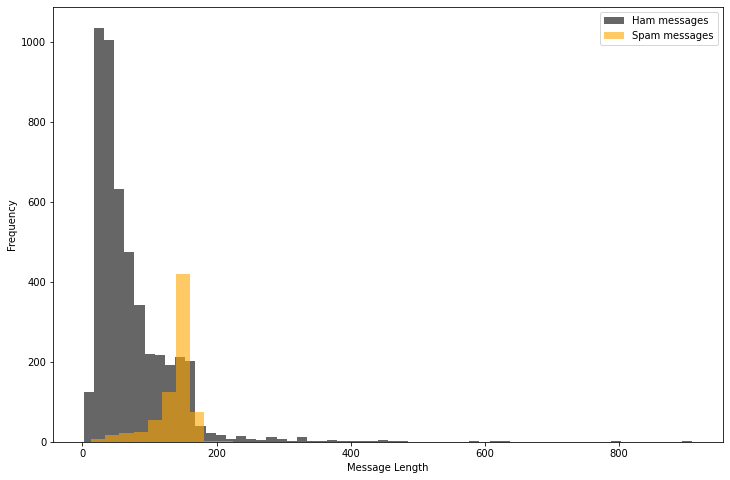

In [ ]:
plt.figure(figsize=(12, 8))

data[data.Class=='ham'].length.plot(bins=60, kind='hist', color='black', 
                                       label='Ham messages', alpha=0.6)
data[data.Class=='spam'].length.plot(kind='hist', color='orange', 
                                       label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

We can observe that spam messages tend to have more characters.

The spam messages are generally longer than ham messages: Bulk of ham has length below 100, for spam it is above 100.

In [ ]:
ham  = data[data['spam'] == 0].copy()
spam = data[data['spam'] == 1].copy()

In [ ]:
def show_wordcloud(data, title):
    text = ' '.join(data['input Text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',colormap='inferno', width=800, height=800).generate(text)
    
    plt.figure(figsize=(10,10))#, frameon=True
    plt.imshow(fig_wordcloud)  
    #plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

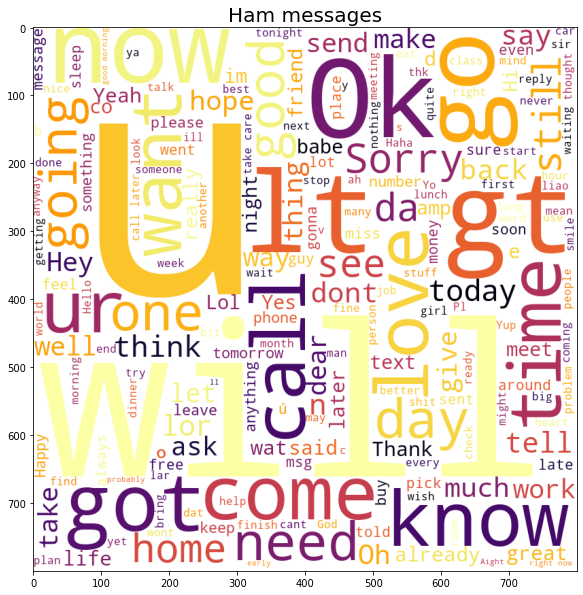

In [ ]:
show_wordcloud(ham, "Ham messages")

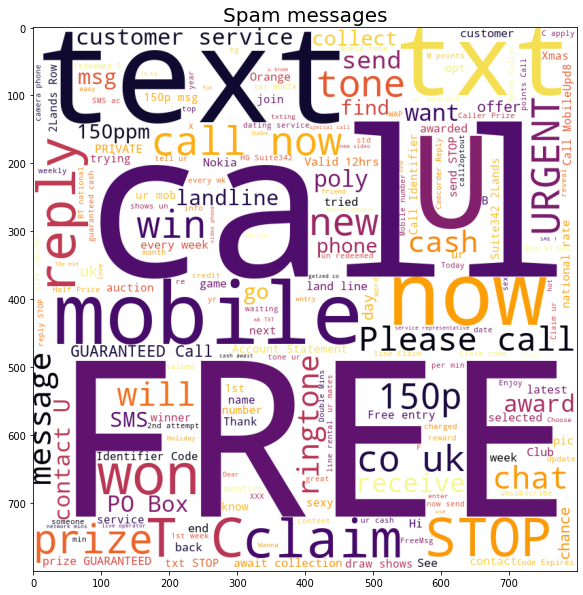

In [ ]:
show_wordcloud(spam, "Spam messages")

So we can observe that Spam messages mostly contain words like FREE, text, call, won, prize, etc

#FEATURE ENGINEERING

**To explore and get to know data better I am creating more features(columns)**

No_of_Char = Number of characters in the input text

No_of_Word = Number of words in the input text

No_of_sen = Number of sentences in the input text

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
data["No_of_Char"] = data["input Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["input Text"]), axis=1).apply(len)
data["No_of_sen"]=data.apply(lambda row: nltk.sent_tokenize(row["input Text"]), axis=1).apply(len)

In [ ]:
data.head()

,Class,input Text,spam,length,No_of_Char,No_of_Words,No_of_sen
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,111,24,2
1,ham,Ok lar... Joking wif u oni...,0,29,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37,2
3,ham,U dun say so early hor... U c already then say...,0,49,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15,1


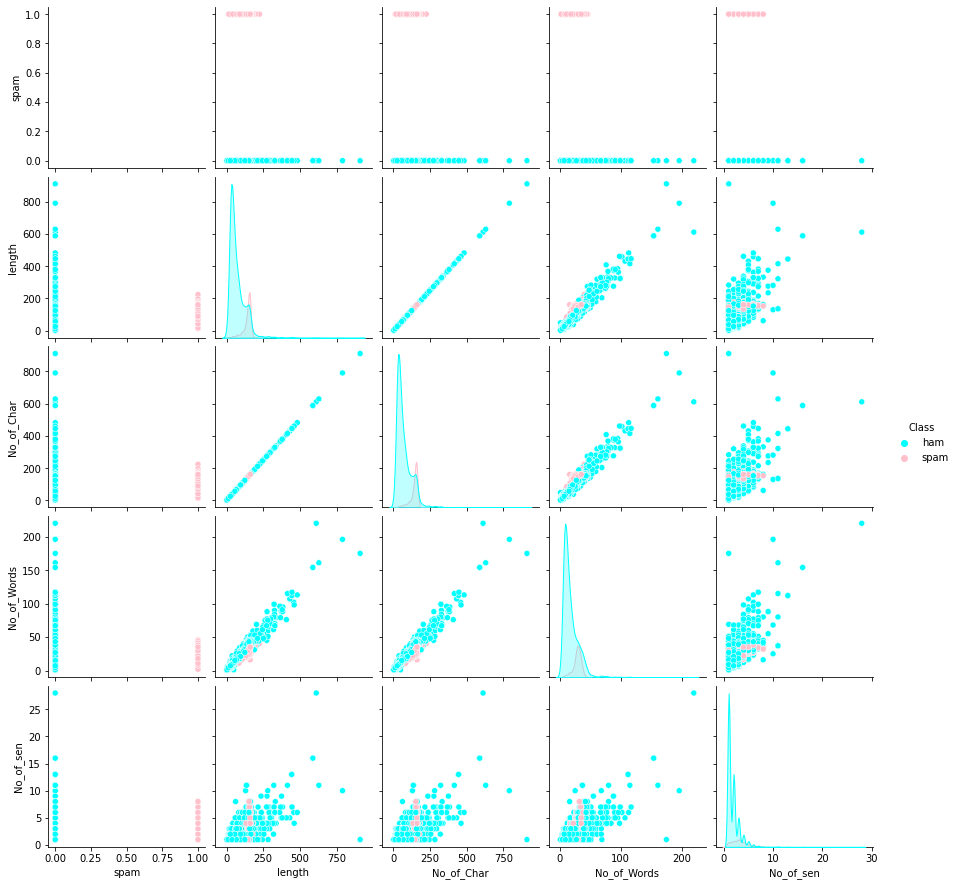

In [ ]:
sns.pairplot(data=data, hue="Class",palette=cols)

Here, we can observe few outliners in the class 'Ham'. Hence, we can drop the outliners as they the same thing i.e length of the input text.

#Data Preprocessing

In [ ]:
import re

In [ ]:
data = data[(data["No_of_Char"]<350)]
data.shape

(5550, 7)

In [ ]:
#function to clean input text
def clean_data(inputText):
    text = re.sub('[^a-zA-Z]', ' ', inputText) #Replacing all non-alphabetic characters with a space
    text = text.lower() #converting input to lowercase
    text = text.split()
    text = ' '.join(text)
    return text

In [ ]:
#cleaning input text
data["cleaned_text"] = data["input Text"].apply(clean_data)
data["cleaned_text"].head()

0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: cleaned_text, dtype: object

**Here, I replaced all non-alphabetic characters with a space and converted the text to lower case**

In [ ]:
#Tokenization
data["Tokenized_Text"]=data.apply(lambda row: nltk.word_tokenize(row["cleaned_text"]), axis=1)
data["Tokenized_Text"].head()

0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Tokenized_Text, dtype: object

**Here, I split the sentence into words(tokens) to remove stopwords in the next step.**

In [ ]:
# function to Remove stopwords
def removing_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data["No_stopword_Text"] = data["Tokenized_Text"].apply(removing_stopwords)
data["No_stopword_Text"].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: No_stopword_Text, dtype: object

**Stopwords give meaning to the sentence structure but do not contribute in NLP. so, I removed stopwords from the input text.**

In [ ]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
data["Lemmatized_Text"] = data["No_stopword_Text"].apply(lemmatization)
data["Lemmatized_Text"].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, live, around, though]
Name: Lemmatized_Text, dtype: object

In [ ]:
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [ ]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [ ]:
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data["Class"])

#1. Remove Punctuation and Stopwords

Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters.

In [ ]:
import string

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
stopwords.words("english")[10:15]

["you've", "you'll", "you'd", 'your', 'yours']

With the above lists for punctuation characters and stop words, we define a function to remove these from the text. This function will also convert all text to lowercase.

Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text.

In [ ]:
# Preprocessing steps
def remove_punctuation_and_stopwords(message):
     # remove punctuation
    message_without_punc = [ch for ch in message if ch not in string.punctuation]
     # tokenize
    message_without_punc = "".join(message_without_punc).split()
     # remove stopword
    message_without_punc_stopwords = \
        [word.lower() for word in message_without_punc if word.lower() not in stopwords.words("english")]
        
    return message_without_punc_stopwords

In [ ]:
data['input_text_clean'] = data['input Text'].apply(remove_punctuation_and_stopwords)

In [ ]:
data.head()

,Class,input Text,spam,length,No_of_Char,No_of_Words,No_of_sen,cleaned_text,Tokenized_Text,No_stopword_Text,Lemmatized_Text,input_text_clean
0,0,"Go until jurong point, crazy.. Available only ...",0,111,111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,0,Ok lar... Joking wif u oni...,0,29,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,0,49,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, live, around, though]","[nah, dont, think, goes, usf, lives, around, t..."


In [ ]:
check = data['input Text'].apply(remove_punctuation_and_stopwords)

In [ ]:
check[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [ ]:
check[1]

['ok', 'lar', 'joking', 'wif', 'u', 'oni']

#Visualization after preprocessing

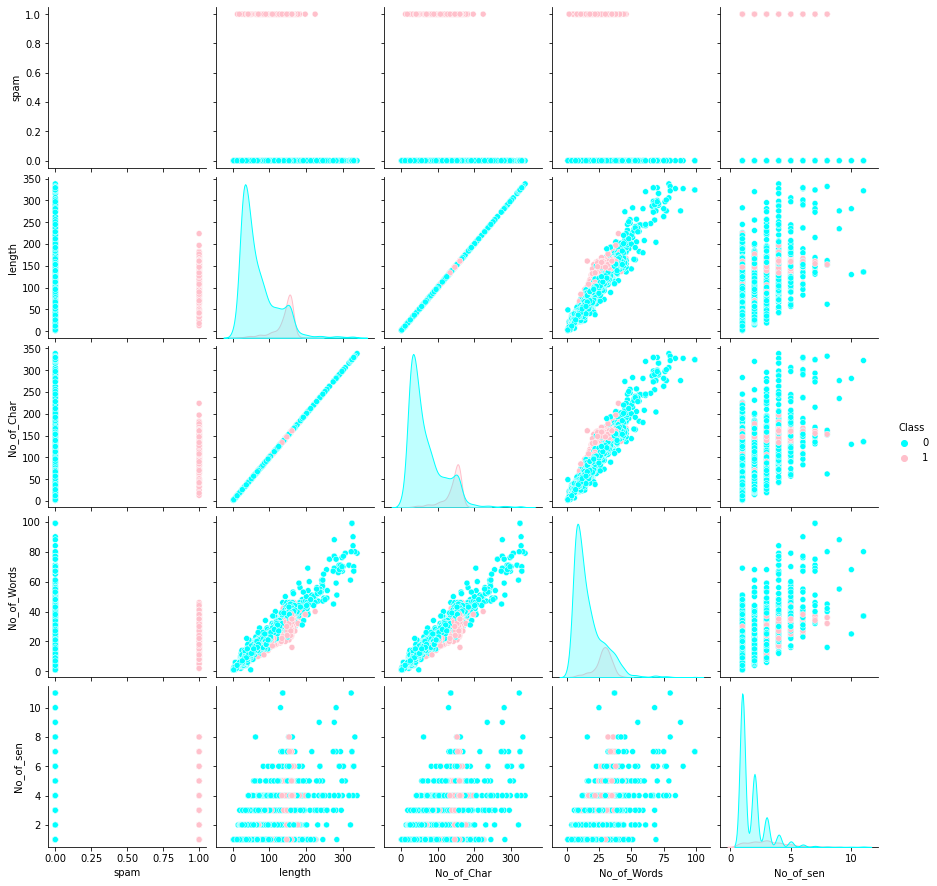

In [ ]:
sns.pairplot(data=data, hue="Class",palette=cols)

Let's see what top 20 spam words are !

In [ ]:
from collections import Counter

In [ ]:
spam.loc[:, 'input Text'] = spam['input Text'].apply(remove_punctuation_and_stopwords)
words_spam = spam['input Text'].tolist()

In [ ]:
list_spam_words = []
for sublist in words_spam:
    for item in sublist:
        list_spam_words.append(item)

In [ ]:
c_spam = Counter(list_spam_words)
df_spamwords_top20 = pd.DataFrame(c_spam.most_common(20), columns=['word', 'count'])

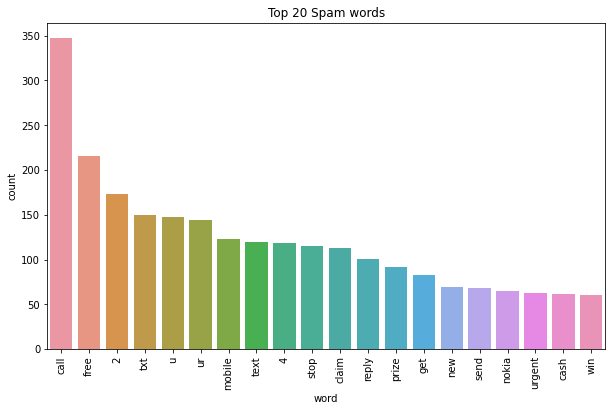

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df_spamwords_top20, ax=ax)
plt.title("Top 20 Spam words")
plt.xticks(rotation='vertical');

#Bag of Words

In [ ]:
from tensorflow import keras
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['input Text'])

In [ ]:
print(len(bow_transformer.vocabulary_))

9400


This tell us that there are 9532 different words counted in the entire dataset.

In [ ]:
sample_spam = data['input Text'][2]
bow_sample_spam = bow_transformer.transform([sample_spam])
print(sample_spam)

print(bow_sample_spam)

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
  (0, 72)	1
  (0, 415)	1
  (0, 422)	1
  (0, 435)	1
  (0, 841)	1
  (0, 1230)	1
  (0, 2295)	1
  (0, 2514)	1
  (0, 3115)	2
  (0, 3250)	2
  (0, 3374)	1
  (0, 3528)	1
  (0, 5274)	1
  (0, 6643)	1
  (0, 6696)	1
  (0, 6753)	1
  (0, 8115)	1
  (0, 8274)	1
  (0, 8485)	1
  (0, 8986)	1
  (0, 9029)	1


In [ ]:
print(bow_transformer.get_feature_names()[3152])
print(bow_transformer.get_feature_names()[3290])

ettans
fans


In [ ]:
# Applying the transformer to entire input data
bow_data = bow_transformer.transform(data['input Text'])


In [ ]:
print('Shape of Sparse Matrix: ', bow_data.shape)
print('Amount of Non-Zero occurences: ', bow_data.nnz)

Shape of Sparse Matrix:  (5550, 9400)
Amount of Non-Zero occurences:  49112


Sparsity refers to a matrix of numbers that includes many zeros or values that will not significantly impact a calculation.

In [ ]:
sparsity = (100.0 * bow_data.nnz / (bow_data.shape[0] * bow_data.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


#TF-IDF

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow_data)

In [ ]:
data_tfidf = tfidf_transformer.transform(bow_data)

#Vectorization

In [ ]:
#Need to convert the text into vectors
tf_vec=TfidfVectorizer()
features=tf_vec.fit_transform(data['input Text'])

In [ ]:
#Split feature and class
x=features
y=data['Class']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=7)

#Models

#1.Naive Bayes

In [ ]:
naiv=MultinomialNB()
naiv.fit(xtrain,ytrain)
pred=naiv.predict(xtest)

y_pred_prob = naiv.predict_proba(xtest)[:, 1]

Accuracy score 0.9633633633633634
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1512
           1       0.71      1.00      0.83       153

    accuracy                           0.96      1665
   macro avg       0.86      0.98      0.91      1665
weighted avg       0.97      0.96      0.97      1665

ROC_AUC Score : 0.99


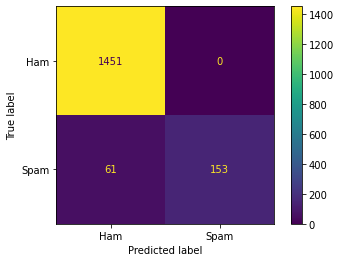

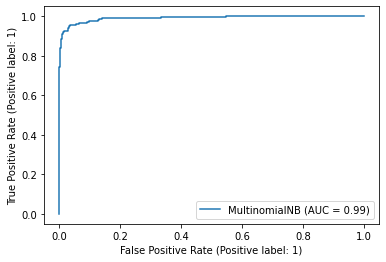

In [ ]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))
# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(naiv, xtest, ytest)

#2.Random Forest

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)

y_pred_prob = rf.predict_proba(xtest)[:, 1]


Accuracy score 0.9753753753753753
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1492
           1       0.81      1.00      0.89       173

    accuracy                           0.98      1665
   macro avg       0.90      0.99      0.94      1665
weighted avg       0.98      0.98      0.98      1665

ROC_AUC Score : 0.99


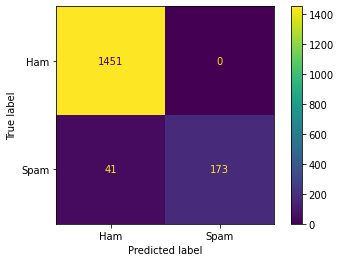

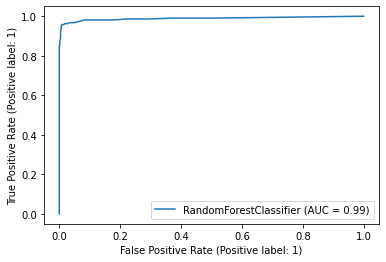

In [ ]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(rf, xtest, ytest)

#3.KNN

In [ ]:

knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
pred=knn.predict(xtest)

y_pred_prob = knn.predict_proba(xtest)[:, 1]

Accuracy score 0.9045045045045045
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1610
           1       0.26      1.00      0.41        55

    accuracy                           0.90      1665
   macro avg       0.63      0.95      0.68      1665
weighted avg       0.98      0.90      0.93      1665

ROC_AUC Score : 0.96


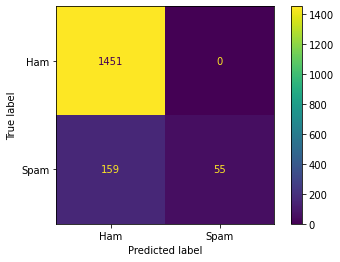

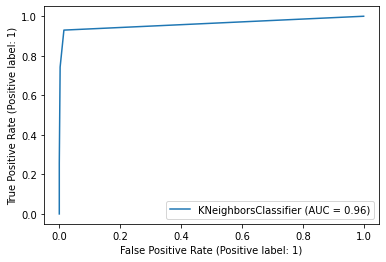

In [ ]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(knn, xtest, ytest)

#4.SVC

In [ ]:
svc = SVC(probability=True)
svc.fit(xtrain,ytrain)
pred=svc.predict(xtest)

y_pred_prob = svc.predict_proba(xtest)[:, 1]


Accuracy score 0.9765765765765766
-----------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1490
           1       0.82      1.00      0.90       175

    accuracy                           0.98      1665
   macro avg       0.91      0.99      0.94      1665
weighted avg       0.98      0.98      0.98      1665

ROC_AUC Score : 0.99


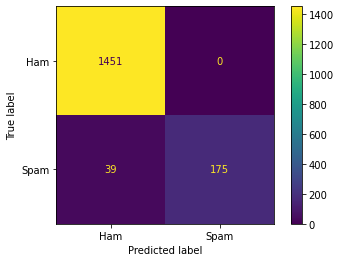

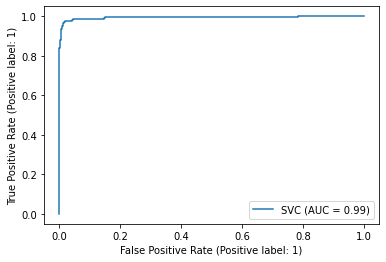

In [ ]:
print('Accuracy score', accuracy_score(pred,ytest))
print('-----------------------------------------')
print('Classification Report')
print(classification_report(pred,ytest))

# calculate ROC_AUC score of class predictions
print("ROC_AUC Score : {:.2f}".format(roc_auc_score(ytest,y_pred_prob)))
# Create confusion matrix
dtcm = sklearn.metrics.confusion_matrix(ytest, pred)
dis = ConfusionMatrixDisplay(dtcm,display_labels=["Ham","Spam"])
dis.plot()
plot.show()
disp = plot_roc_curve(svc, xtest, ytest)

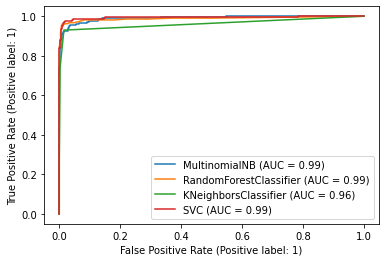

In [ ]:
disp = plot_roc_curve(naiv, xtest, ytest)
plot_roc_curve(rf, xtest, ytest, ax=disp.ax_);
plot_roc_curve(knn, xtest, ytest, ax=disp.ax_)
plot_roc_curve(svc, xtest, ytest, ax=disp.ax_)